In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### Random Sampling

In [3]:
file1 = pd.read_csv(r'C:\Users\Asus\Downloads\OECD PISA data.csv')

In [4]:
file1.head()

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value
0,0,AUS,PISAMATH,BOY,2003,527.000
1,1,AUS,PISAMATH,BOY,2006,527.000
2,2,AUS,PISAMATH,BOY,2009,519.000
3,3,AUS,PISAMATH,BOY,2012,510.115
4,4,AUS,PISAMATH,BOY,2015,497.000


In [5]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      2087 non-null   int64  
 1   LOCATION   2087 non-null   object 
 2   INDICATOR  2087 non-null   object 
 3   SUBJECT    2087 non-null   object 
 4   TIME       2087 non-null   int64  
 5   Value      2087 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 98.0+ KB


In [6]:
file1.describe()

,index,TIME,Value
count,2087.000000,2087.000000,2087.000000
mean,1043.000000,2010.814087,487.644684
std,602.609326,5.317975,38.644532
min,0.000000,2000.000000,348.000000
25%,521.500000,2006.000000,475.000000
50%,1043.000000,2012.000000,495.000000
75%,1564.500000,2015.000000,512.000000
max,2086.000000,2018.000000,574.000000


In [7]:
file1.skew(numeric_only=True)

index    0.000000
TIME    -0.270026
Value   -1.091074
dtype: float64

In [26]:
r_sample1 = file1.sample(50)
print(r_sample1)

      index LOCATION    INDICATOR SUBJECT  TIME    Value
1810   1810      EST  PISASCIENCE    GIRL  2006  533.000
1842   1842      RUS  PISASCIENCE    GIRL  2018  478.000
1843   1843      SVN  PISASCIENCE     BOY  2006  515.000
529     529      JPN     PISAMATH     TOT  2003  534.000
288     288      ESP     PISAMATH     BOY  2009  493.000
1167   1167      RUS     PISAREAD     BOY  2003  428.000
576     576      POL     PISAMATH     TOT  2018  516.000
969     969      NZL     PISAREAD    GIRL  2000  553.000
136     136      ISL     PISAMATH    GIRL  2003  523.000
1537   1537      DNK  PISASCIENCE     BOY  2012  503.533
84       84      FRA     PISAMATH     BOY  2009  505.000
324     324      TUR     PISAMATH     BOY  2009  451.000
316     316      CHE     PISAMATH    GIRL  2003  518.000
120     120      HUN     PISAMATH     BOY  2009  496.000
1530   1530      CZE  PISASCIENCE    GIRL  2006  510.000
1055   1055      SWE     PISAREAD    GIRL  2018  523.000
1072   1072      TUR     PISARE

#### Systematic Sampling

In [35]:
sys_indexes = range(0, len(file1), 30)

In [36]:
sys_sample = file1.loc[sys_indexes]

In [37]:
print(sys_sample)

      index LOCATION    INDICATOR SUBJECT  TIME  Value
0         0      AUS     PISAMATH     BOY  2003  527.0
30       30      BEL     PISAMATH    GIRL  2009  504.0
60       60      DNK     PISAMATH     BOY  2009  511.0
90       90      FRA     PISAMATH    GIRL  2009  489.0
120     120      HUN     PISAMATH     BOY  2009  496.0
...     ...      ...          ...     ...   ...    ...
1950   1950      LUX  PISASCIENCE     TOT  2018  477.0
1980   1980      PRT  PISASCIENCE     TOT  2018  492.0
2010   2010      GBR  PISASCIENCE     TOT  2018  505.0
2040   2040      ISR  PISASCIENCE     TOT  2018  462.0
2070   2070      HKG  PISASCIENCE    GIRL  2015  524.0

[70 rows x 6 columns]


####  Stratified Sampling

In stratified sampling, we select the samples by dividing the population into subgroups called strata and randomly sampling the data from each stratum.

In [94]:
file1.groupby(['LOCATION', 'SUBJECT'])[['TIME', 'Value']].apply(lambda x:x.sample(3, replace = False))

TIME  Value
LOCATION SUBJECT                  
AUS      BOY     700   2000  513.0
                 701   2003  506.0
                 702   2006  495.0
         GIRL    710   2009  533.0
                 1496  2018  502.0
...                     ...    ...
USA      GIRL    352   2009  477.0
                 351   2006  470.0
         TOT     2014  2015  496.0
                 621   2012  481.0
                 620   2009  487.0

[423 rows x 2 columns]

In [89]:
d1 = file1.groupby(['LOCATION', 'SUBJECT']).apply(len)

In [123]:
d2 = file1.groupby(['LOCATION', 'SUBJECT']).apply(lambda x : x.sample(frac = .1))

In [124]:
d2['LOCATION'].value_counts()

LOCATION
AUS     6
NOR     6
ISR     6
ITA     6
JPN     6
KOR     6
LUX     6
MEX     6
NLD     6
NZL     6
IRL     6
POL     6
PRT     6
RUS     6
SVK     6
SVN     6
SWE     6
TUR     6
AUT     6
ISL     6
IDN     6
DNK     6
BEL     6
BRA     6
CAN     6
CHE     6
CHL     6
CZE     6
HUN     6
DEU     6
ESP     6
EST     6
FIN     6
FRA     6
GBR     6
GRC     6
USA     6
OAVG    5
LVA     4
COL     3
Name: count, dtype: int64

#### Central-Limit-Theorem

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 10000x1000 with 0 Axes>

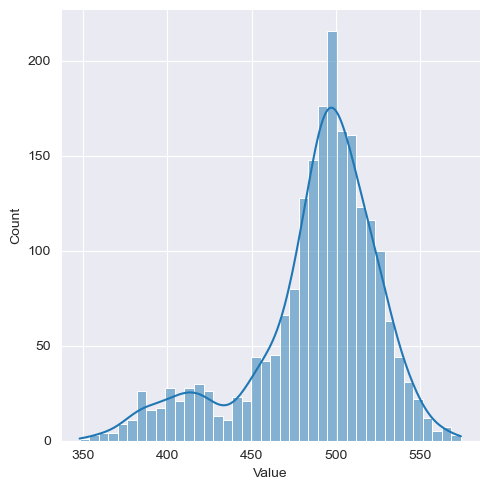

In [135]:
fig = plt.figure(figsize = (100, 10))
sns.displot(file1.Value, kde = True) 
plt.show()

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


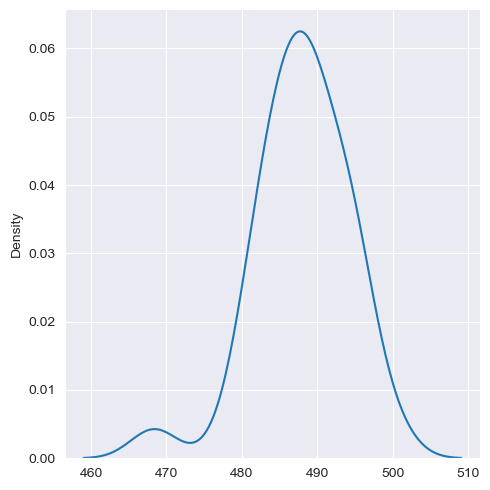

In [173]:
r_sample2 = []
for i in range(30):
    r_sample2.append(file1['Value'].sample(50).mean())  
sns.displot(r_sample2, kind='kde')

In [167]:
import statistics as st

In [176]:
print(st.mean(r_sample2))
print(st.mean(file1['Value']))

487.958378
487.6446842357451


[0.56365926 0.24574993 0.98758872 0.72493348 0.03078225 0.52907833
 0.37573961 0.19664815 0.05450396 0.11372798 0.93174647 0.04582456
 0.84524318 0.67004991 0.77350575 0.95005018 0.11325704 0.61049576
 0.98092032 0.65414592 0.97203161 0.96021714 0.95060677 0.70896053
 0.06648751 0.62503775 0.39732618 0.11481627 0.87690279 0.60601084
 0.07980244 0.76001513 0.56323043 0.39906623 0.52211223 0.43806884
 0.04210977 0.2850432  0.88292188 0.75387704 0.71846375 0.28837097
 0.81352264 0.556905   0.31596816 0.50748779 0.83667102 0.23695274
 0.13866269 0.54314479 0.72032524 0.40162273 0.28553154 0.07744915
 0.65273833 0.81230796 0.3087995  0.75606888 0.74996109 0.45152619
 0.27742122 0.58093928 0.56506765 0.31120103 0.48134149 0.01408433
 0.69990199 0.5239821  0.67222315 0.58339386 0.65534508 0.0597196
 0.91614386 0.08975476 0.55194492 0.37170763 0.15501138 0.54512651
 0.10089795 0.31271799 0.1882053  0.7141107  0.05105412 0.65949057
 0.34127237 0.27899212 0.58742177 0.45197936 0.38616831 0.44876

array([ 0.24961401, -0.90301369,  1.78663348,  0.83433775, -1.68241108,
        0.12423568, -0.43171672, -1.08103953, -1.59640452, -1.38167897,
        1.58416907, -1.62787297,  1.27053851,  0.63534918,  1.01044374,
        1.65053192, -1.38338643,  0.41942673,  1.76245623,  0.57768688,
        1.73022888,  1.68739376,  1.65254992,  0.77642543, -1.55295634,
        0.47215086, -0.35345141, -1.37773322,  1.38532516,  0.40316598,
       -1.50468109,  0.9615315 ,  0.2480592 , -0.34714259,  0.09897906,
       -0.2057328 , -1.64134148, -0.76055009,  1.40714825,  0.93927694,
        0.81088078, -0.74848475,  1.15553096,  0.22512543, -0.64842703,
        0.04595595,  1.23945885, -0.93490922, -1.29127447,  0.17523571,
        0.81762986, -0.33787362, -0.75877953, -1.51321328,  0.57258345,
        1.15112695, -0.67441807,  0.94722378,  0.92507906, -0.15694117,
       -0.78818472,  0.31226528,  0.25472032, -0.66571097, -0.04884136,
       -1.74295191,  0.74358232,  0.10575853,  0.64322859,  0.32

#### Confidence Interval

In [183]:
data = np.random.randint(0,2,10)

In [191]:
stats.t.interval(confidence=.9, df = len(data) -1, loc = data.mean(), scale = stats.sem(data))

(0.194481177891061, 0.8055188221089389)

In [200]:
stats.norm.interval(confidence=.9, scale = data.std()/(len(data))**(1/2), loc = data.mean())

(0.2399258060622212, 0.7600741939377786)

#### Hypothesis Testing

#### Z-TEST

In [203]:
import math
import scipy

A school claimed that the student's study is more intelligent than the average school. On calculating the IQ scores of 50 students, the average turns out to be 110. The mean of the population IQ is 100 and the standard deviation is 15. State whether the claim of principal is right or not at a 5% significance level.

In [214]:
def z_test(n, alpha, s_mean, p_mean, p_std, alternative):
    z_score = (s_mean - p_mean)/(p_std/math.sqrt(n))
    p_value = stats.norm.sf(z_score)
    print(z_score)
    print(p_value)
    if alternative == 'one-sided':
        if p_value > alpha:
            print("Failed to reject the Null Hypothesis")
        else:
            print("Rejected the Null Hypothesis")
    elif alternative == 'two-sided':
        if p_value > (alpha/2):
            print("Failed to reject the Null Hypothesis")
        else:
            prnint("Rejected the Null Hypothesis")

In [215]:
z_test(50, 0.05, 110, 100, 15, 'one-sided')

4.714045207910317
1.2142337364879197e-06
Rejected the Null Hypothesis


In [216]:
z_test(81, 0.05, 90, 82, 20, 'one-sided')

3.5999999999999996
0.00015910859015753396
Rejected the Null Hypothesis


#### T-Test

In [217]:
import random

In [249]:
data2 = 20 * np.random.randn(30) + 140

In [250]:
print(data2.mean())
print(data2.std())

138.723340937668
20.031276924408036


In [251]:
t_statics, p_value2 = stats.ttest_1samp(a = data2, popmean = 100)

In [252]:
print(t_statics, p_value2)

10.41029853559189 2.6299750429839904e-11


In [240]:
alpha = 0.05

In [272]:
if p_value2 > alpha:
    print('Failed to reject the Null Hypothesis')
else:
    print('Rejected the Null Hypothesis')

Rejected the Null Hypothesis


In [246]:
def t_test(n, alpha2, s_mean, s_std, p_mean):
    t_score = (s_mean - p_mean)/(s_std/math.sqrt(n))
    p_value3 = stats.t.sf(t_score, n-1)
    
    print(t_score)
    print(p_value3)

In [253]:
t_test(30, 0.05, 140, 20, 100)

10.954451150103322
4.010643570113305e-12


#### Chi-Square Test

In [266]:
chi_statistics , p_value = stats.chisquare([48, 24, 24], [32, 32, 32])

In [267]:
alpha3 = 0.05
if alpha > p_value : 
    print("Failed to reject the Null Hypothesis")
else:
    print("Rejected the Null Hypothesis")

Failed to reject the Null Hypothesis


In [268]:
chi_statistics2 , p_value3 = stats.chisquare([5, 9, 13, 7, 6])

In [270]:
if alpha > p_value :
    print("Failed to reject the Null Hypothesis")
else:
    print("Rejected the Null Hypothesis")

Failed to reject the Null Hypothesis


In [273]:
stats.chi2_contingency([[207, 282, 241], [234, 242, 232]])

Chi2ContingencyResult(statistic=4.542228269825232, pvalue=0.1031971404730939, dof=2, expected_freq=array([[223.87343533, 266.00834492, 240.11821975],
       [217.12656467, 257.99165508, 232.88178025]]))